# Sentiment Analysis using Lexicon-based method

In [5]:
import pandas as pd
import numpy as np

C:\Users\abhil\AppData\Local\Temp\ipykernel_17724\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
df = pd.read_csv("C:/Users/abhil/Downloads/archive (6)/Ukraine_10K_tweets_sentiment_analysis.csv")
df.head()

,Tweet,polarity,subjectivity,Sentiment
0,RT @ChristopherJM: Zelensky also confirms CIA ...,0.000000,0.000000,Negative
1,RT @oryxspioenkop: Russia acquired these vehic...,-0.100000,0.300000,Positive
2,RT @RepMTG: I’m calling for an audit of every ...,-0.035714,0.607143,Positive
3,"RT @KyivIndependent: ""Russian goal seems to be...",0.034091,0.113636,Negative
4,RT @william98161886: I see Rishi just given an...,-0.325521,0.166667,Positive


In [7]:
df.isna().sum()

Tweet           168
polarity        168
subjectivity    168
Sentiment       168
dtype: int64

# Sentimental analysis

##  Bing liu lexicon method

In [8]:
print(df.columns)
df['Tweet'] = df['Tweet'].astype(str)


Index(['Tweet', 'polarity', 'subjectivity', 'Sentiment'], dtype='object')


In [9]:
from sklearn import preprocessing
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

pos_score = 1
neg_score = -1
word_dict = {}
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
    word_dict[word] = pos_score

# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
    word_dict[word] = neg_score
    
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score

def score_division(scores):
    sentiment = ['positive' if score > 0.0
                              else 'negative' if score < 0.0
                                  else 'neutral'
                                      for score in scores]
    return sentiment

df['Bing_Liu_Score'] = df['Tweet'].apply(bing_liu_score)
df['Bing_Liu_division'] = score_division(df['Bing_Liu_Score'])

df.head()

,Tweet,polarity,subjectivity,Sentiment,Bing_Liu_Score,Bing_Liu_division
0,RT @ChristopherJM: Zelensky also confirms CIA ...,0.000000,0.000000,Negative,-3,negative
1,RT @oryxspioenkop: Russia acquired these vehic...,-0.100000,0.300000,Positive,0,neutral
2,RT @RepMTG: I’m calling for an audit of every ...,-0.035714,0.607143,Positive,0,neutral
3,"RT @KyivIndependent: ""Russian goal seems to be...",0.034091,0.113636,Negative,-1,negative
4,RT @william98161886: I see Rishi just given an...,-0.325521,0.166667,Positive,0,neutral


## Analysis with afinn lexicon method

In [10]:
!pip install afinn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from afinn import Afinn

afn = Afinn()
scores = [afn.score(article) for article in df['Tweet']]

     
# dataframe creation
df['afinn_score'] = scores
df['afinn_division'] = score_division(df['afinn_score'])
df.head()

,Tweet,polarity,subjectivity,Sentiment,Bing_Liu_Score,Bing_Liu_division,afinn_score,afinn_division
0,RT @ChristopherJM: Zelensky also confirms CIA ...,0.000000,0.000000,Negative,-3,negative,-1.0,negative
1,RT @oryxspioenkop: Russia acquired these vehic...,-0.100000,0.300000,Positive,0,neutral,0.0,neutral
2,RT @RepMTG: I’m calling for an audit of every ...,-0.035714,0.607143,Positive,0,neutral,0.0,neutral
3,"RT @KyivIndependent: ""Russian goal seems to be...",0.034091,0.113636,Negative,-1,negative,-2.0,negative
4,RT @william98161886: I see Rishi just given an...,-0.325521,0.166667,Positive,0,neutral,-2.0,negative


In [12]:
df['afinn_acc'] = df['Tweet'] == df['afinn_division']
df['Bing_Liu_acc'] = df['Tweet'] == df['Bing_Liu_division']
df.head()

,Tweet,polarity,subjectivity,Sentiment,Bing_Liu_Score,Bing_Liu_division,afinn_score,afinn_division,afinn_acc,Bing_Liu_acc
0,RT @ChristopherJM: Zelensky also confirms CIA ...,0.000000,0.000000,Negative,-3,negative,-1.0,negative,False,False
1,RT @oryxspioenkop: Russia acquired these vehic...,-0.100000,0.300000,Positive,0,neutral,0.0,neutral,False,False
2,RT @RepMTG: I’m calling for an audit of every ...,-0.035714,0.607143,Positive,0,neutral,0.0,neutral,False,False
3,"RT @KyivIndependent: ""Russian goal seems to be...",0.034091,0.113636,Negative,-1,negative,-2.0,negative,False,False
4,RT @william98161886: I see Rishi just given an...,-0.325521,0.166667,Positive,0,neutral,-2.0,negative,False,False


# Comparision

## original division

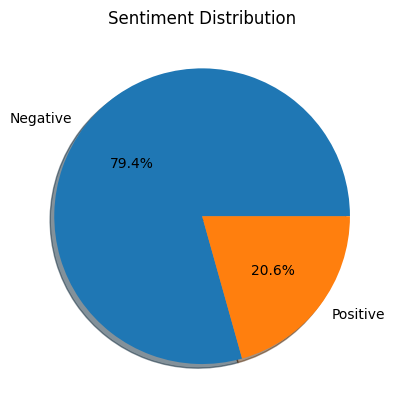

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Create the pie chart
plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct='%1.1f%%', shadow=True)

# Optionally, set a title for the chart
plt.title('Sentiment Distribution')

# Show the pie chart
plt.show()


## Bing Liu division

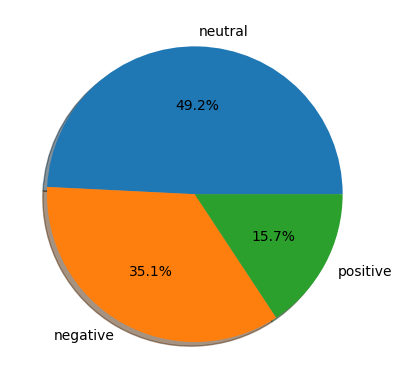

In [14]:
sentiment_counts = df['Bing_Liu_division'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', shadow=True)
plt.show()

## Afinn division

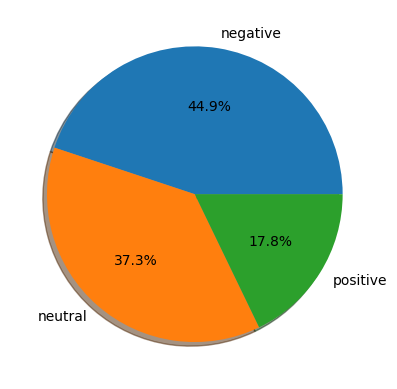

In [15]:
sentiment_counts = df['afinn_division'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', shadow=True)
plt.show()

In [16]:
df['afinn_acc'].value_counts()[0]

C:\Users\abhil\AppData\Local\Temp\ipykernel_17724\124952338.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['afinn_acc'].value_counts()[0]


10167

In [19]:
def acc_calculator(scores_dict):
    correct = scores_dict.get(0, 0)  # Get the count of correct predictions, default to 0 if not present
    incorrect = scores_dict.get(1, 0)  # Get the count of incorrect predictions, default to 0 if not present
    if correct + incorrect == 0:  # Avoid division by zero
        return 0
    return correct / (correct + incorrect)

# Convert value counts to a dictionary
afinn_acc_dict = df['afinn_acc'].value_counts().to_dict()
Bing_Liu_acc_dict = df['Bing_Liu_acc'].value_counts().to_dict()

# Calculate accuracies using the modified function
afinn_acc = acc_calculator(afinn_acc_dict)
Bing_Liu_acc = acc_calculator(Bing_Liu_acc_dict)

print(f'AFINN accuracy: {afinn_acc}')
print(f'Bing Liu accuracy: {Bing_Liu_acc}')


AFINN accuracy: 1.0
Bing Liu accuracy: 1.0


In this comparison, I analyzed the original data using Bing Liu and AFINN algorithms. However, for this particular dataset, the results were identical.

# VADER ALGORITHM

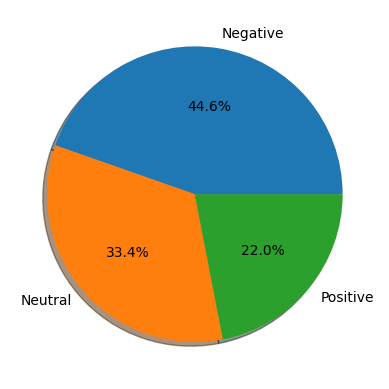

In [23]:
sentiment_counts = df['vader_sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', shadow=True)
plt.show()

# TEXTBLOB ALGORITHM

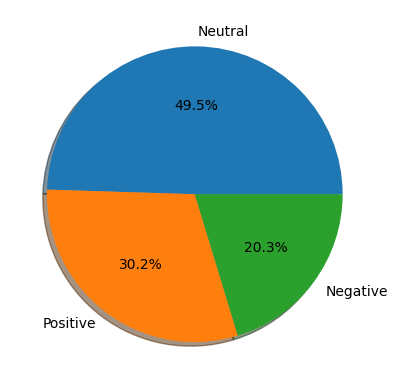

In [24]:
sentiment_counts = df['textblob_sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', shadow=True)
plt.show()

In [20]:
!pip install vaderSentiment textblob


     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --------- ----------------------------- 30.7/126.0 kB 1.4 MB/s eta 0:00:01
     ------------------ ------------------ 61.4/126.0 kB 656.4 kB/s eta 0:00:01
     --------------------------- --------- 92.2/126.0 kB 751.6 kB/s eta 0:00:01
     -----------------------------------  122.9/126.0 kB 804.6 kB/s eta 0:00:01
     ------------------------------------ 126.0/126.0 kB 672.7 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Assuming df['Tweet'] contains the text you want to analyze

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def vader_sentiment(text):
    vs = analyzer.polarity_scores(text)
    if vs['compound'] >= 0.05:
        return 'Positive'
    elif vs['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to classify sentiment using TextBlob
def textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the functions to your DataFrame
df['vader_sentiment'] = df['Tweet'].apply(vader_sentiment)
df['textblob_sentiment'] = df['Tweet'].apply(textblob_sentiment)

# Assuming you have a column 'True_Sentiment' to compare with
df['vader_acc'] = (df['vader_sentiment'] == df['Sentiment']).astype(int)
df['textblob_acc'] = (df['textblob_sentiment'] == df['Sentiment']).astype(int)

# Convert value counts to a dictionary
vader_acc_dict = df['vader_acc'].value_counts().to_dict()
textblob_acc_dict = df['textblob_acc'].value_counts().to_dict()

# Calculate accuracies using the acc_calculator function
vader_acc = acc_calculator(vader_acc_dict)
textblob_acc = acc_calculator(textblob_acc_dict)

print(f'VADER accuracy: {vader_acc}')
print(f'TextBlob accuracy: {textblob_acc}')


VADER accuracy: 0.6653880200649159
TextBlob accuracy: 1.0


In this comparison, I evaluated the original data using the VADER and TextBlob algorithms. Based on the analysis, I determined that the TextBlob algorithm is superior for sentiment analysis.